# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [81]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import matplotlib.dates as mpl_dates

def leaflet_plot_stations(binsize, hashid):

    #df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize)) - use in final submission
    
    df = pd.read_csv('BinSize_d{}.csv'.format(binsize))
    
    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

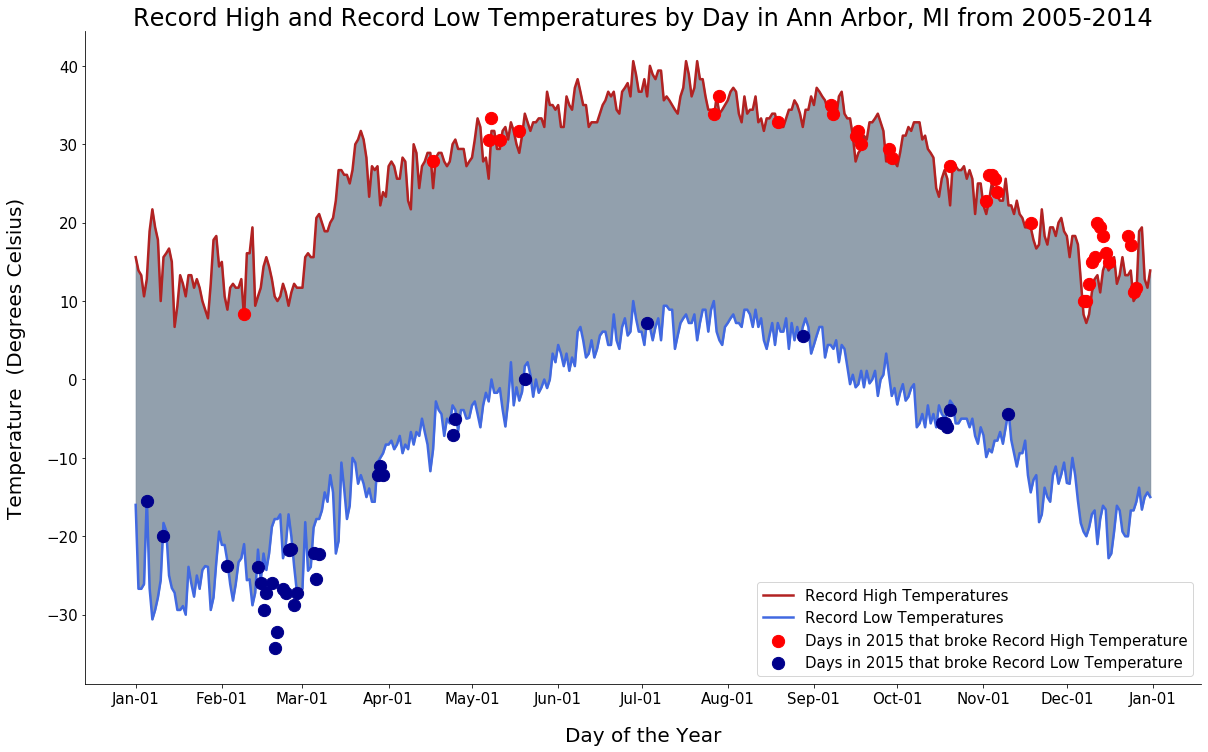

In [82]:
#display full dataframes
pd.set_option("display.max_rows", None, "display.max_columns", None)

#load csv
df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

#drop leap year values
df = df[df["Date"].str[5:] != "02-29"]

#convert "Date" column to datetime

df['Date'] = pd.to_datetime(df['Date'])

#sort Date column

df.sort_values(by = ['Date'], inplace= True)

#drop data from 2015
df_2005_2014 = df[(df['Date'].dt.year != 2015)]

#drop all non-2015 data
df_2015 = df[(df['Date'].dt.year == 2015)]

#group data by date

grouped_df = df_2005_2014.groupby('Date')
grouped_df_2015 = df_2015.groupby('Date')

#get the highs and lows for each day between 2005 and 2014
highs = pd.DataFrame(grouped_df.max()["Data_Value"])
lows = pd.DataFrame(grouped_df.min()["Data_Value"])

#get highs and lows for 2015
highs_2015 = pd.DataFrame(grouped_df_2015.max()["Data_Value"])
lows_2015 = pd.DataFrame(grouped_df_2015.min()["Data_Value"])

#set dummy year in index of both highs and lows
highs.index = highs.index.map(lambda x: x.replace(year=2000))
lows.index = lows.index.map(lambda x: x.replace(year=2000))

#set dummy year in index of both highs_2015 and lows_2015
highs_2015.index = highs_2015.index.map(lambda x: x.replace(year=2000))
lows_2015.index = lows_2015.index.map(lambda x: x.replace(year=2000))


#create dataframes of record highs and lows over period
record_highs = pd.DataFrame(highs.groupby(highs.index).max()["Data_Value"])
record_lows = pd.DataFrame(lows.groupby(lows.index).min()["Data_Value"])

#convert to degrees celsius
record_highs["Data_Value"] = record_highs["Data_Value"]/10
record_lows["Data_Value"] = record_lows["Data_Value"]/10

highs_2015["Data_Value"] = highs_2015["Data_Value"]/10
lows_2015["Data_Value"] = lows_2015["Data_Value"]/10

#get 2015 dates that broke records
record_break_high_2015 = highs_2015.where(highs_2015["Data_Value"]>record_highs["Data_Value"])
record_break_low_2015 = lows_2015.where(lows_2015["Data_Value"]<record_lows["Data_Value"])
 
      
#plot record highs and record lows

record_high_line, = plt.plot(record_highs.index, record_highs["Data_Value"], color = "firebrick", linewidth = 2.5, zorder = 0)
record_low_line,  = plt.plot(record_lows.index, record_lows["Data_Value"], color = "royalblue", linewidth=2.5, zorder = 0)

#set plot title and axes labels
plt.title("Record High and Record Low Temperatures by Day in Ann Arbor, MI from 2005-2014", fontsize =24)
plt.xlabel("Day of the Year", fontsize = 20, labelpad = 20)
plt.ylabel("Temperature  (Degrees Celsius)", fontsize = 20, labelpad = 20)

#shade area between lines
plt.fill_between(record_highs.index, record_highs["Data_Value"], record_lows["Data_Value"],  color="lightslategrey", alpha = 0.8, zorder = 0)

#change size of figure
plt.rcParams['figure.figsize'] = (20,12)

#set xtick frequency and format
date_format = mpl_dates.DateFormatter('%b-%d')
plt.gca().xaxis.set_major_locator(mpl_dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(date_format)

#increase tick fontsize
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#remove right and top spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

#plot 2015 data
record_break_high_2015_scatter = plt.scatter(highs_2015.index, record_break_high_2015["Data_Value"], s= 150, color = "red", zorder=1)
record_break_low_2015_scatter = plt.scatter(lows_2015.index, record_break_low_2015["Data_Value"], s=150, color = "darkblue", zorder = 1)

#create legend
plt.legend(handles = [record_high_line, record_low_line, record_break_high_2015_scatter, record_break_low_2015_scatter], labels =  ['Record High Temperatures', 'Record Low Temperatures', 'Days in 2015 that broke Record High Temperature', 'Days in 2015 that broke Record Low Temperature'], loc = "lower right", fontsize = 15)

plt.savefig('Assignment2.pdf')

plt.show()


